In [12]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_pickle('data/pickles/df_Original')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [30]:
print("Dataset Dimensions: {} rows x {} columns".format(df.shape[0],df.shape[1]))

Dataset Dimensions: 786363 rows x 29 columns


In [31]:
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

A look at the missing values in our data set reveals that some columns have a very large amount of missing values which will certainly have an adverse effect on our modelling.

echoBuffer, merchantCity , merchantState, merchantZip ,posOnPremises, recurringAuthInd are respective columns with over 700,000 missing values. Keeping these columns will heavily influence our analysis considering the dimesions of our dataset. (786363x29)

In [32]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'], axis=1, inplace=True)

# df= df.reset_index(drop=True)
# print(df.isnull().sum())
df.index

RangeIndex(start=0, stop=786363, step=1)

In [33]:
df= df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=786363, step=1)

In [34]:
df_clean=df.copy()
df_clean.mode()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,380680241.0,380680241.0,5000.0,250.0,2016-05-28T14:24:41,0.0,Uber,US,US,05,...,2014-06-21,2016-03-15,869.0,869.0,593.0,PURCHASE,0.0,False,False,False
1,NaN,NaN,NaN,NaN,2016-12-25T14:04:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_clean= df_clean.fillna(df_clean.mode().iloc[0])
df_clean.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

# Summary Statistics of Numerical Data

Here I will subset important numerical data from our data frame and calculate their summary statistics. The number of null values, the unique values, the minimum Value, maximum value, mean value, standard deviation are some of the Statistics we will be looking at.

In [36]:
numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
df_num= df_clean[numeric_cols]

for col in df_num:
    print(f"Columns: {col}")
    print(f"Number of unique values: {df_clean[col].nunique()}")
    print(f"Unique values: {df_clean[col].unique()}")
    print(f"Minimum Value: {df_num[col].min()}")
    print(f"Maximum Value: {df_num[col].max()}")
    print(f"Mean Value: {df_num[col].mean()}")
    print(f"Standard Deviation: {df_num[col].std()}\n")

Columns: creditLimit
Number of unique values: 10
Unique values: [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
Minimum Value: 250
Maximum Value: 50000
Mean Value: 10759.464458526152
Standard Deviation: 11636.174889935899

Columns: availableMoney
Number of unique values: 521915
Unique values: [ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83]
Minimum Value: -1005.63
Maximum Value: 50000.0
Mean Value: 6250.725369288736
Standard Deviation: 8880.783989148062

Columns: transactionAmount
Number of unique values: 66038
Unique values: [ 98.55  74.51   7.47 ... 482.13 451.71 624.07]
Minimum Value: 0.0
Maximum Value: 2011.54
Mean Value: 136.98579095150708
Standard Deviation: 147.7255690194876

Columns: currentBalance
Number of unique values: 487318
Unique values: [   0.      9.37   40.75 ... 1095.04 1214.96 1233.85]
Minimum Value: 0.0
Maximum Value: 47498.81
Mean Value: 4508.739089237413
Standard Deviation: 6457.442068133206



In [39]:
cat_cols = ['merchantName', 'acqCountry','merchantCountryCode', 'posEntryMode' , 'transactionType', 'isFraud']

df_categorical = df[cat_cols]

# for col in df_categorical:
#     print(f"Column: {col}")
#     print(f"Number of Unique values: {df[col].nunique()}")
#     print(f"Unique values: {df[col].unique()}")

# Compute summary statistics for each categorical column
for col in df_categorical:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values:\n{df[col].value_counts()}\n")

Column: merchantName
Number of unique values: 2490
Unique values:
merchantName
Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: count, Length: 2490, dtype: int64

Column: acqCountry
Number of unique values: 4
Unique values:
acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64

Column: merchantCountryCode
Number of unique values: 4
Unique values:
merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64

Column: posEntryMode
Number of unique values: 5
Unique values:
posEntryMode
05    315035
09    236481
02    195934
90     1

# PLOTS

### VISUALIZATION OF DATA - NUMERIC DATA

Here we will visualize the numerical data to draw inferences. Visualizing numerical data can help us gain several inferences, such as the Distributions and the existing Relationships in our data.

We can visualize the relationship between two numerical variables using scatter plots. This helps us understand whether there is a correlation between the two variables and the nature of that correlation.

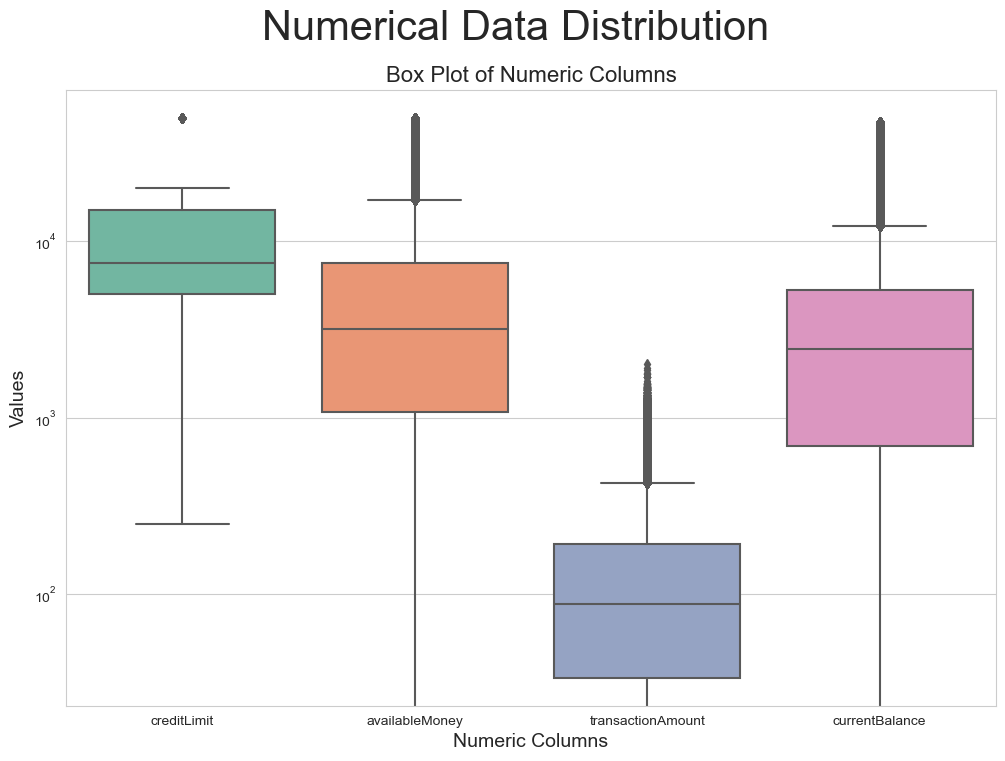

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
#sns.boxplot(data=df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']],palatte="Set2")
sns.boxplot(data=df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']], palette="Set2")

plt.yscale("log")
plt.title("Box Plot of Numeric Columns", fontsize=16)
plt.xlabel('Numeric Columns', fontsize=14)
plt.ylabel('Values',fontsize=14)
plt.suptitle('Numerical Data Distribution',fontsize=30)
plt.xticks(ticks=range(4),labels=['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance'])
plt.show()

## Box Plot Observations

Credit Limit:
  Credit Limit distribution appears to be as expected. There is a very high value of the outlier. This is ordinary as it is not easy to obtain a credit card with a high Credit Limit.



Available Money:
  One would generally expect that the money avilable for credit transactions would be higher.
As the values increase the outliers increase. This is expected as larger sums are available only to a few customers.



Transaction Amount:
  The observed transaction amounts are quite low. This could indicate that customers would rather not make heavy transactions on credit.



Current Balance:
  Bank Balance for the customers appears to be quite low. This is surprising.

## Visualizing Histograms

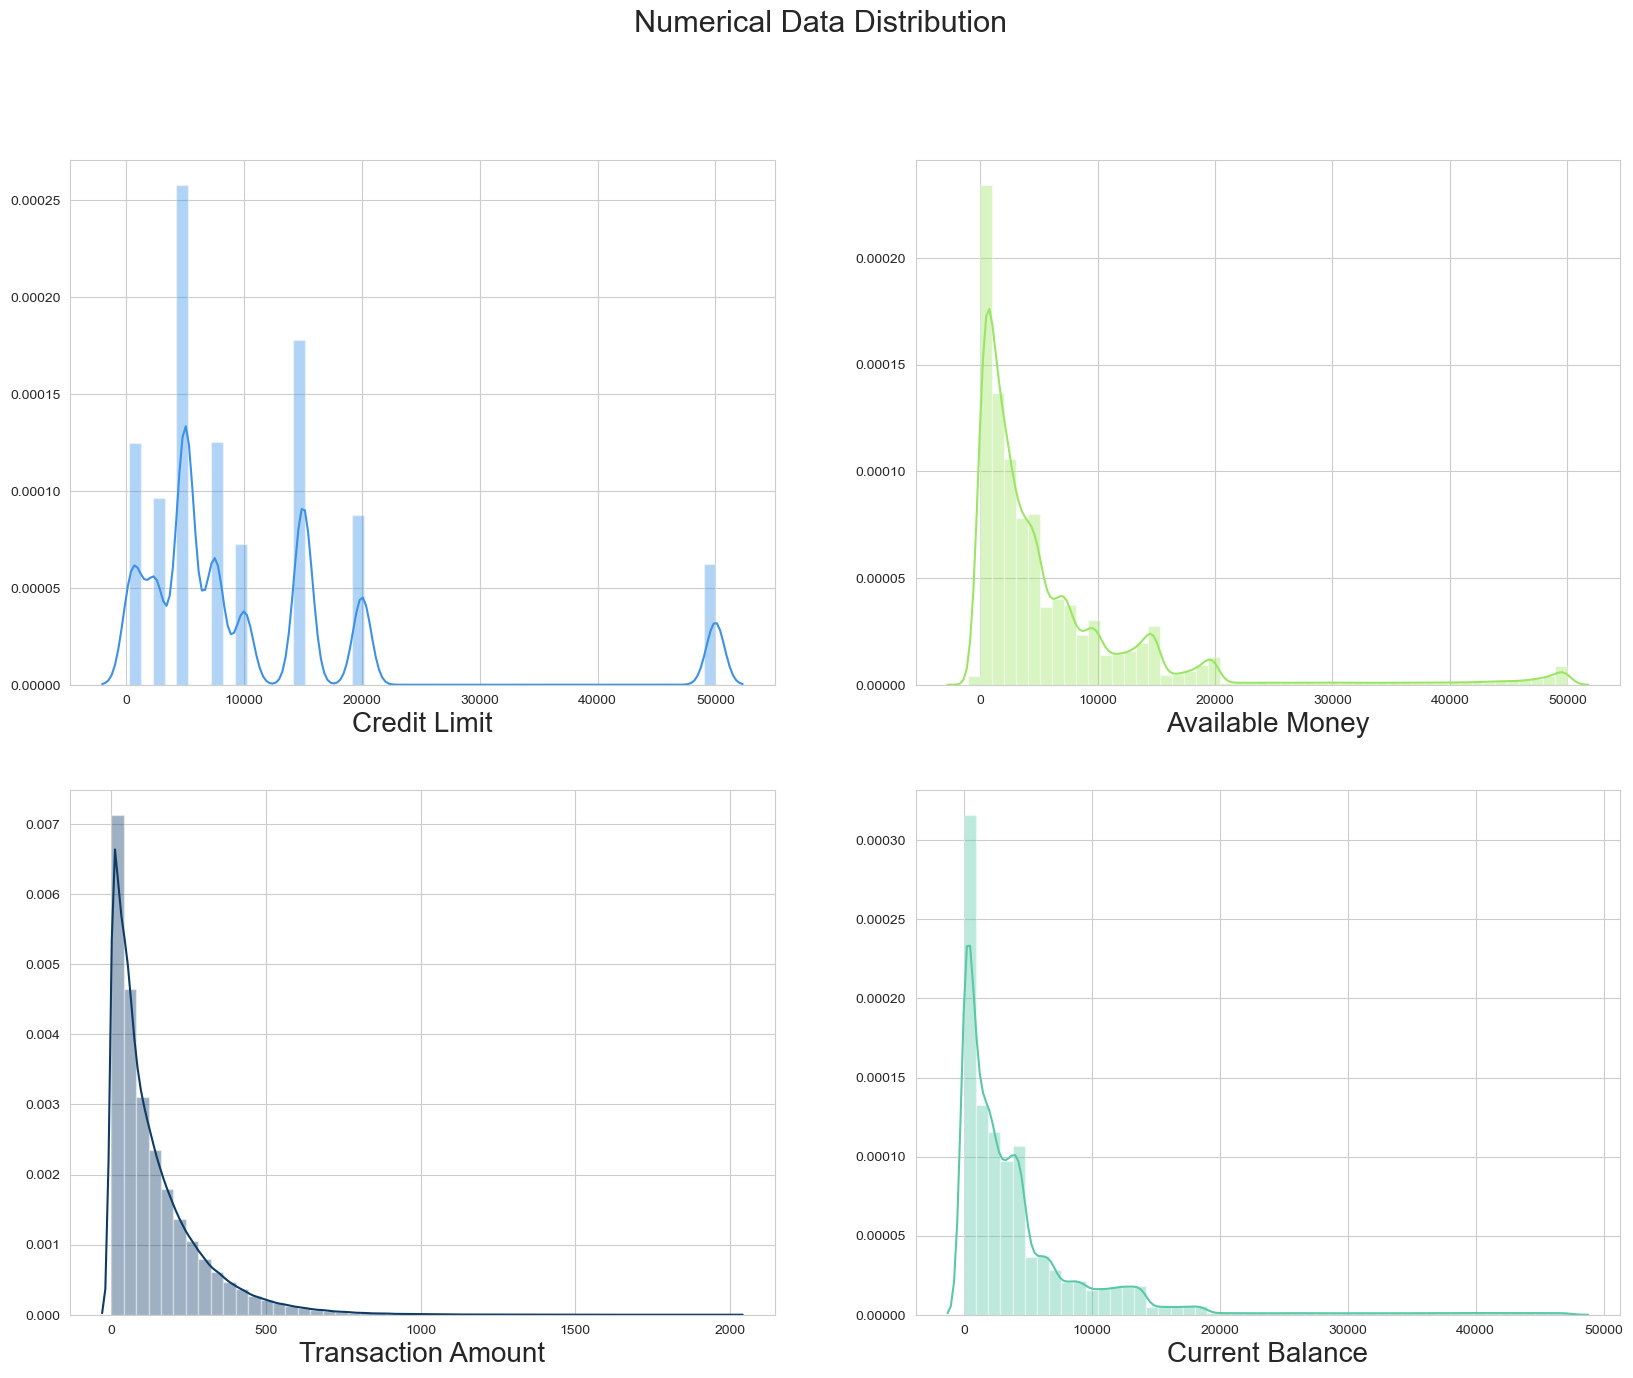

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#9BE564', '#0D3B66', '#59C9A5']

for i, ax in enumerate(axes.flat):
    sns.distplot(df[numeric_cols[i]], ax=ax, color= colors[i])
    ax.set_xlabel(neat_cols[i], fontsize=20)
    ax.set_ylabel('')
    
fig.suptitle('Numerical Data Distribution', fontsize=22)
#fig.tight_layout(rect=[0,0.03,1,0.95])

plt.show()

### Observations from Histograms of Numerical data

Credit Limit:  
Credit Limit quite visibly follows a multi-modal distribution. There are multiple peaks in the distribution, with each peak representing a group of individuals with a specific credit limit range. This suggests that there may be different credit limit policies for different groups of customers or that different types of credit products are being offered to customers with different credit limits.

Available Money:  
The Available money is quite visibly right skewed. This could mean that most of the customers have a lower available money balance, while a few customers have a very high available money balance. This suggests that most customers may be using their credit cards frequently.

Transaction Amount: 
The Transaction amount distribution is right skewed as well. This is consistent with our earlier observation that the transaction amounts are quite low with few high outlier values.

Current Balanace:  
Current Balance is right skewed as well, this too is consistent with our earlier observation that the Bank Balalnce of customers was low.

### Plotting the Realtionship between Credit Limit and Transaction Amount

Text(0, 0.5, 'Transaction Amount')

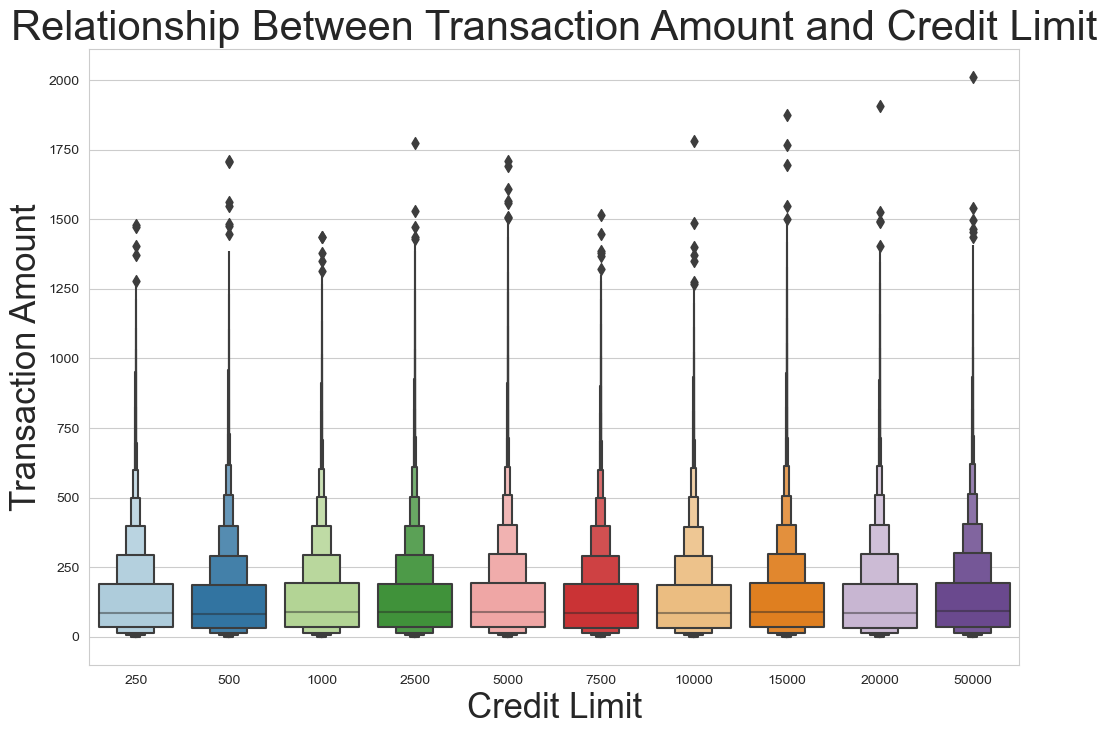

In [52]:
fig = plt.subplots(figsize=(12,8))
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='Paired')
plt.title('Relationship Between Transaction Amount and Credit Limit', fontsize = 30)
plt.xlabel('Credit Limit', fontsize = 25)
plt.ylabel('Transaction Amount', fontsize = 25)

#### Observations from the Transaction Amount and Credit Limit Plot:

My initial hypothesis would have been that Higher Credit Limits would mean higher transaction amounts. This does not seem to be the case.

The fact that a higher credit limit does not necessarily mean higher transaction amounts suggests that credit limits are not the only factor influencing transaction behavior.

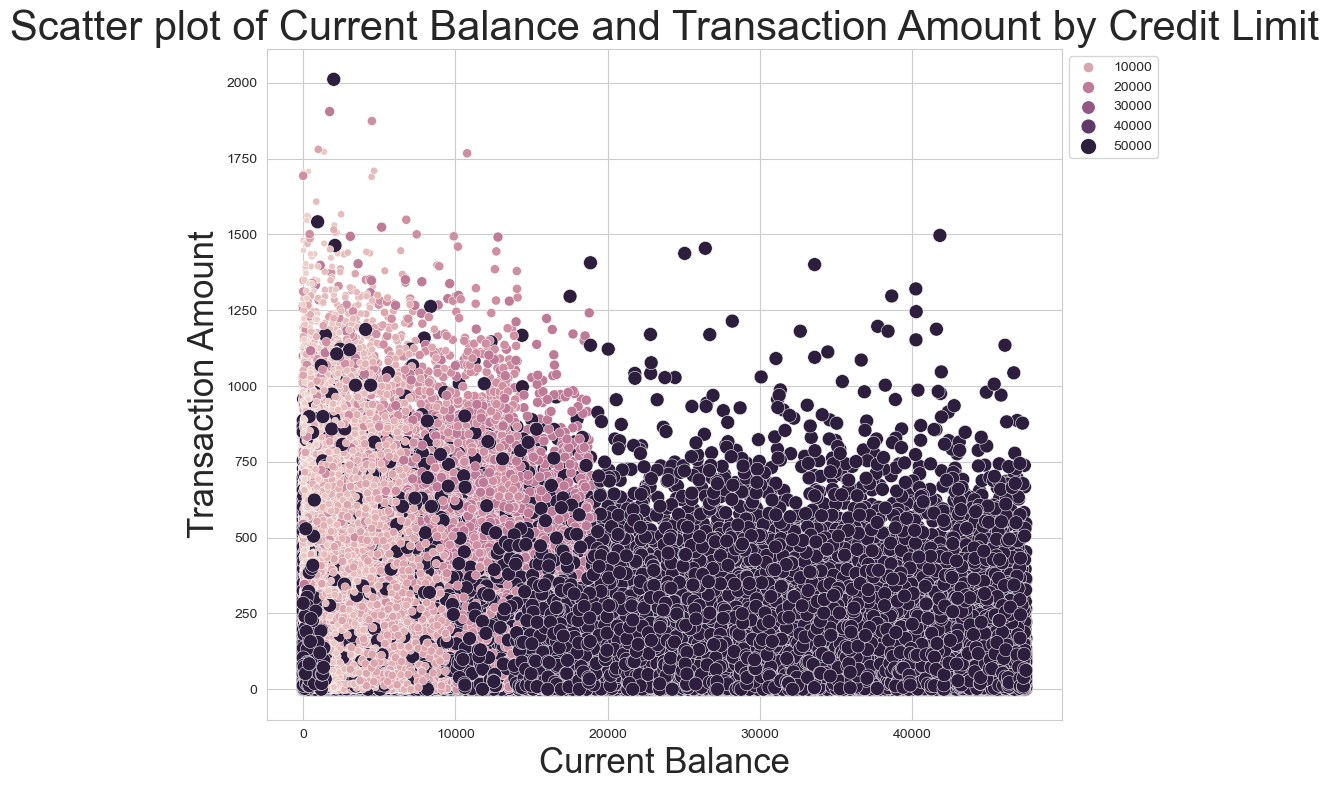

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit', size='creditLimit', sizes=(20,100))

plt.xlabel('Current Balance', fontsize=25)
plt.ylabel('Transaction Amount', fontsize=25)
plt.title('Scatter plot of Current Balance and Transaction Amount by Credit Limit', fontsize = 30)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()

In [59]:
def MatchCVV(df):
    df['matchCVV'] = df['cardCVV']==df['enteredCVV']
    df['matchCVV'] = df['matchCVV'].astype(int)
    
    df.drop(['cardCVV','enteredCVV'], axis=1, inplace = True)
    return df

df_new = MatchCVV(df_clean)

In [58]:
df_new[df_new.matchCVV!=1]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchCVV
19,574788567,574788567,2500,2304.46,2016-01-29T07:33:15,196.07,Shell Auto Body,US,US,09,...,08/2022,2015-10-13,2015-10-13,4219,PURCHASE,195.54,True,False,False,0
100,924729945,924729945,50000,50000.00,2016-10-04T04:20:04,168.57,discount.com,US,US,05,...,11/2024,2014-07-25,2014-07-25,9459,PURCHASE,0.00,False,False,False,0
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,11/2024,2014-07-25,2014-07-25,9459,REVERSAL,168.57,False,False,False,0
211,984504651,984504651,50000,35211.58,2016-02-16T18:41:33,296.68,WSC #467811,US,US,05,...,02/2032,2015-07-27,2015-07-27,8332,PURCHASE,14788.42,False,False,False,0
261,984504651,984504651,50000,27469.74,2016-03-12T00:26:54,670.23,Walgreens #853025,US,US,09,...,02/2030,2015-07-27,2015-07-27,8332,PURCHASE,22530.26,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786154,638498773,638498773,10000,2911.57,2016-05-19T05:11:33,59.52,Pizza Hut #213060,US,US,05,...,05/2031,2014-11-17,2014-11-17,4635,PURCHASE,7088.43,True,False,False,0
786194,638498773,638498773,10000,3761.24,2016-08-22T17:35:15,177.89,Burger King #252057,US,US,05,...,11/2023,2014-11-17,2014-11-17,4635,PURCHASE,6238.76,True,False,False,0
786228,638498773,638498773,10000,4153.23,2016-11-15T17:56:05,45.56,Popeyes #179461,US,US,09,...,04/2027,2014-11-17,2014-11-17,321,PURCHASE,5846.77,True,False,False,0
786265,732852505,732852505,50000,49688.67,2016-02-16T23:02:52,0.00,Lyft,US,US,05,...,08/2022,2012-08-23,2012-08-23,3783,ADDRESS_VERIFICATION,311.33,False,False,False,0


Percentage of Fraudulent transactions having matching CVV = 98.365%


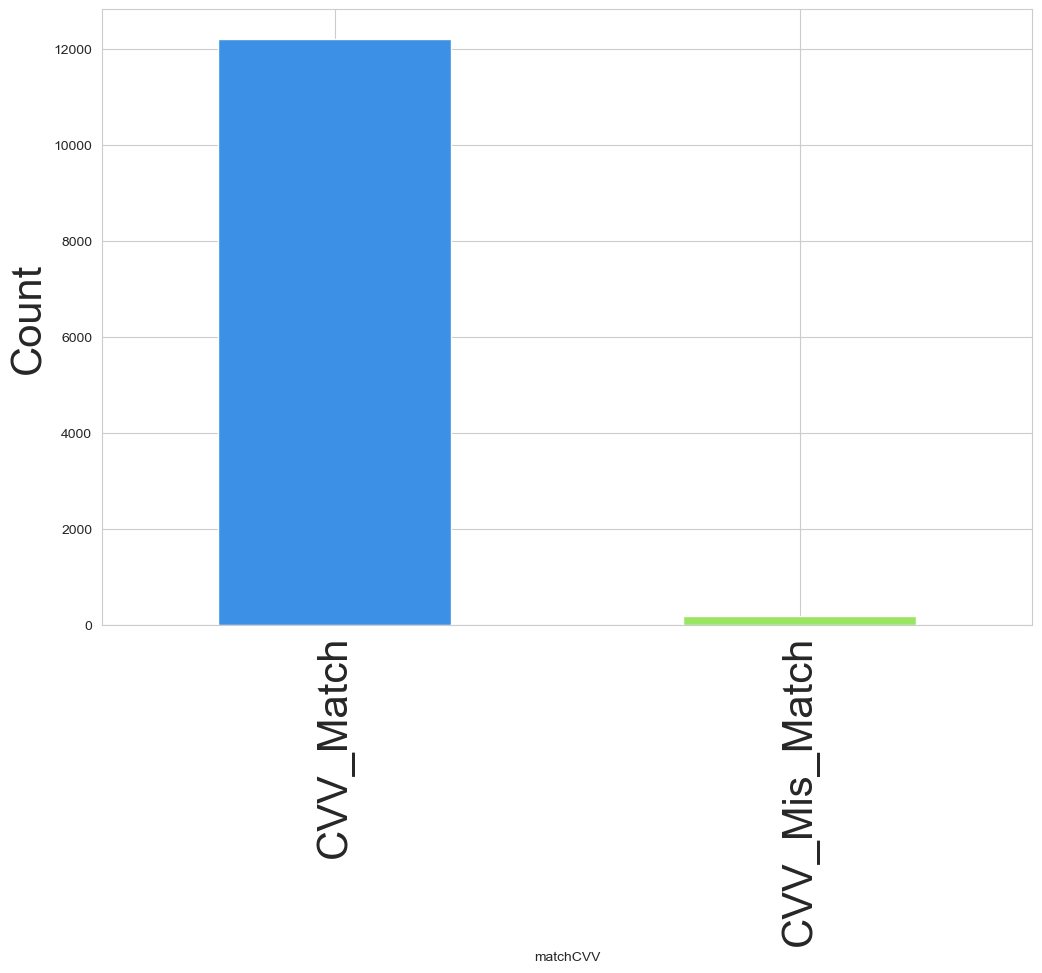

In [61]:
fraudTransactions= df_new.loc[df_new['isFraud']==1]

fig= plt.subplots(figsize=(12,8))
color= sns.color_palette("Set2", len(fraudTransactions))
fraudTransactions['matchCVV'].value_counts().plot.bar(color=colors)
plt.xticks(ticks=[0,1], labels=['CVV_Match', 'CVV_Mis_Match'], fontsize=30)
plt.ylabel('Count', fontsize=30)

percentage= 100*fraudTransactions["matchCVV"].value_counts()[1]/(fraudTransactions["matchCVV"].value_counts()[1] + fraudTransactions["matchCVV"].value_counts()[0])

print(f"Percentage of Fraudulent transactions having matching CVV = {round(percentage, 3)}%")

CVV Match is quite predominant at 98.365% even in Fraudulent Transactions.

This is worrysome as it indicated that secure cvv codes are not deterrents for Fraudulent transactions.

### Presence of Card

Percentage of Fraudulent transactions having Card Absent = 72.175%


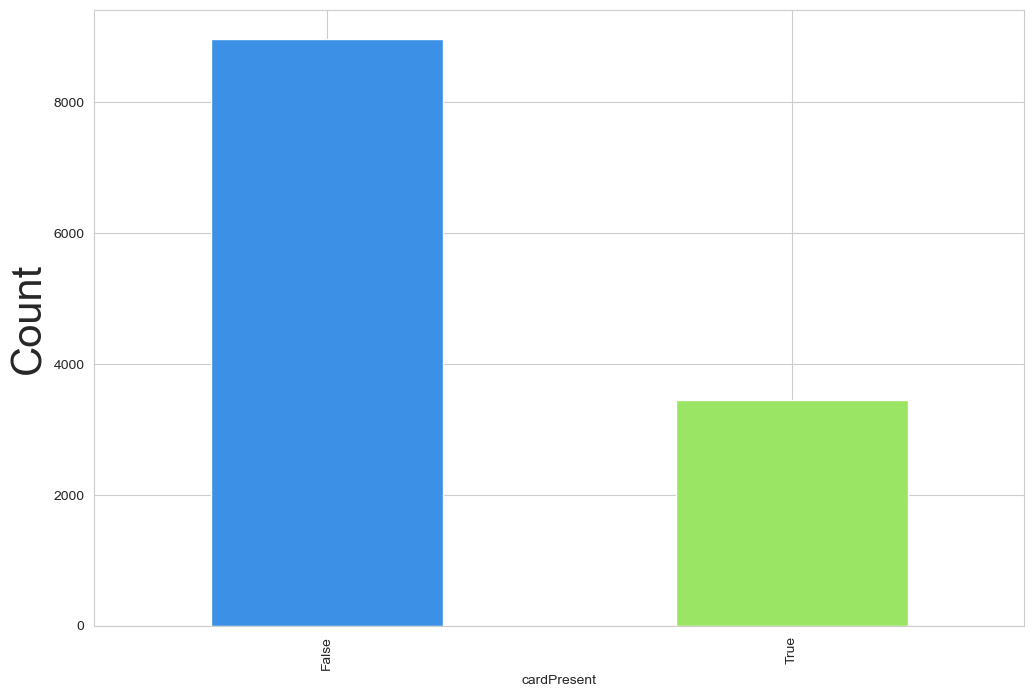

In [62]:
fraudTransactions= df_new.loc[df_new['isFraud']==1]

fig= plt.subplots(figsize=(12,8))
color= sns.color_palette("Set2", len(fraudTransactions))
fraudTransactions['cardPresent'].value_counts().plot.bar(color=colors)
plt.ylabel('Count', fontsize=30)

percentage= 100*fraudTransactions["cardPresent"].value_counts()[0]/(fraudTransactions["cardPresent"].value_counts()[1] + fraudTransactions["cardPresent"].value_counts()[0])

print(f"Percentage of Fraudulent transactions having Card Absent = {round(percentage, 3)}%")

Percentage of Fraudelent transactions where card was absent=2.067%


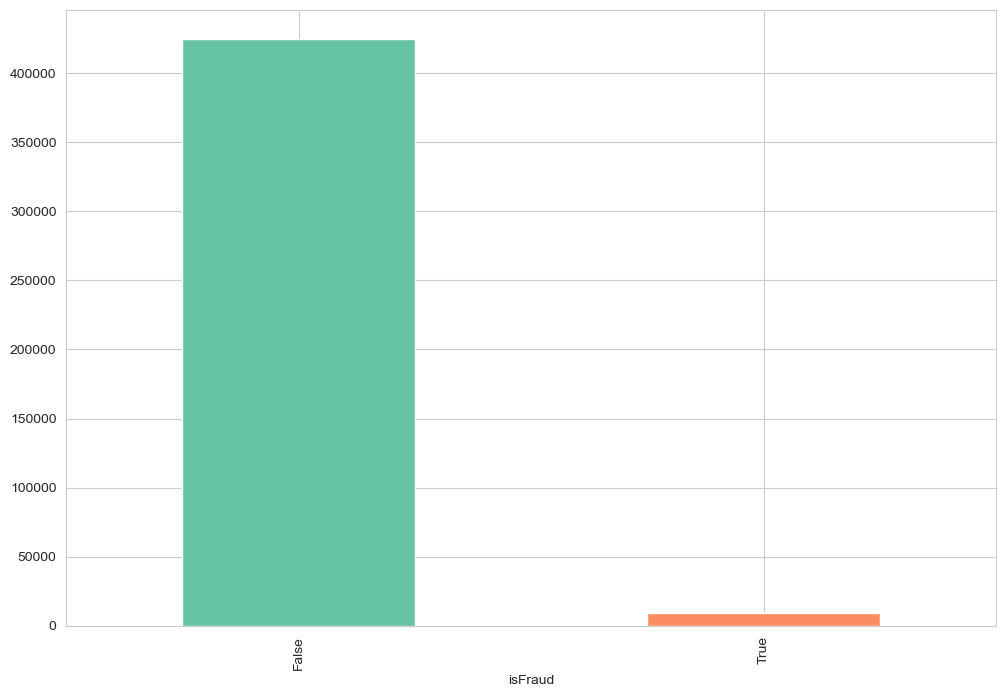

In [65]:
cardAbsentTransaction = df_new.loc[df_new['cardPresent']==0]

fig= plt.subplots(figsize=(12,8))

colors = sns.color_palette("Set2", len(cardAbsentTransaction))
cardAbsentTransaction['isFraud'].value_counts().plot.bar(color=colors)
percentage = 100*cardAbsentTransaction["isFraud"].value_counts()[1]/(cardAbsentTransaction["isFraud"].value_counts()[1]+cardAbsentTransaction["isFraud"].value_counts()[0])
print(f"Percentage of Fraudelent transactions where card was absent={round(percentage,3)}%")

### OBSERVATION

Fraudsters seem to have been able to mimic the presence of a card or actually possess cards.

### Merchant Name

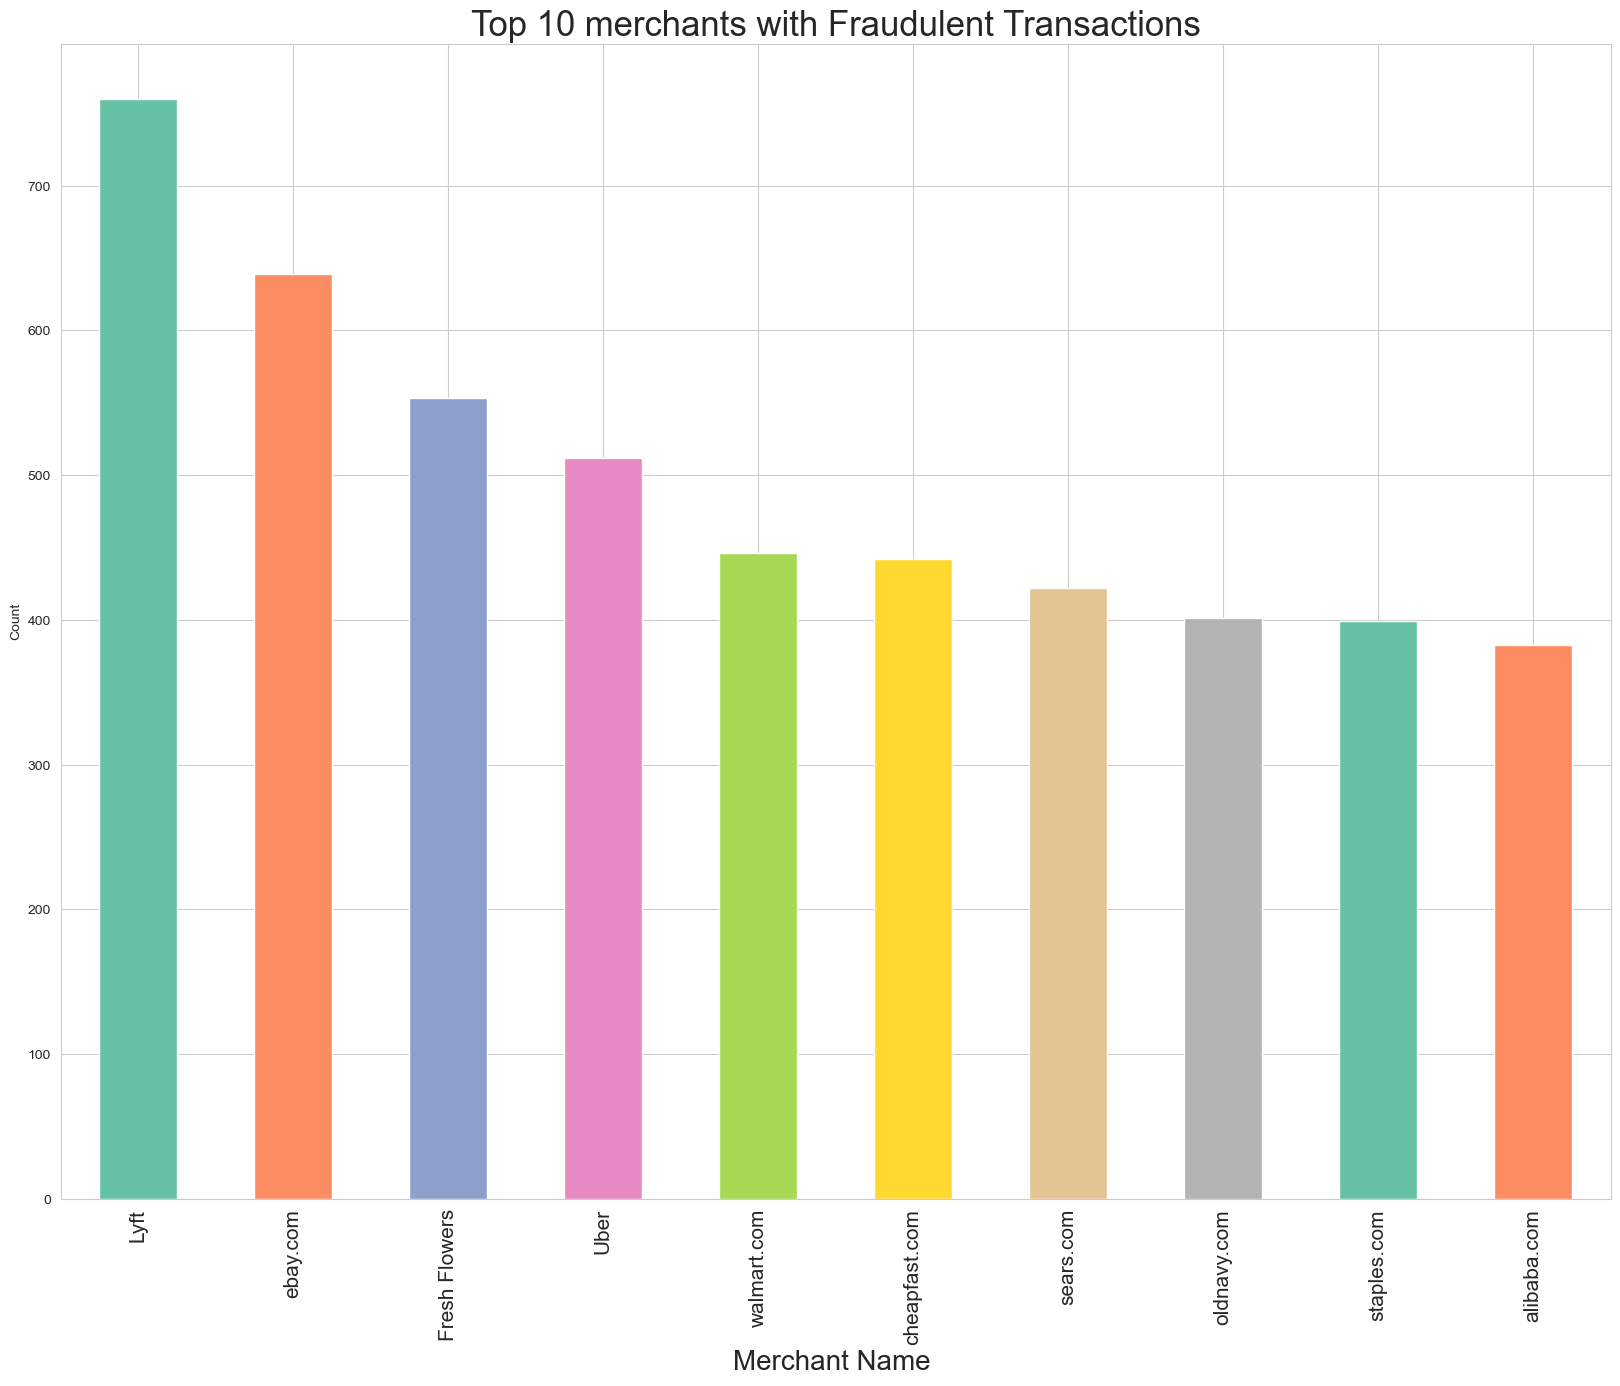

In [70]:
fraudTransactions= df_new.loc[df_new['isFraud']==1]
fig= plt.subplots(figsize=(20,15))

top_merchant = fraudTransactions['merchantName'].value_counts()[:10]
colors= sns.color_palette("Set2", len(top_merchant))
top_merchant.plot.bar(color=colors)
plt.xlabel('Merchant Name ', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Count')
plt.title('Top 10 merchants with Fraudulent Transactions', fontsize=25)
plt.show()

Lyft and ebay.com Show the Highest Number of Fraudulent Transactions.

This could be indicative of the fact that Fraudsters will mask fradulent transactions under legitimate brand names to avoid suspiscion.

### Top 10 Accounts with Most Frauds

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraudulent Transactions')

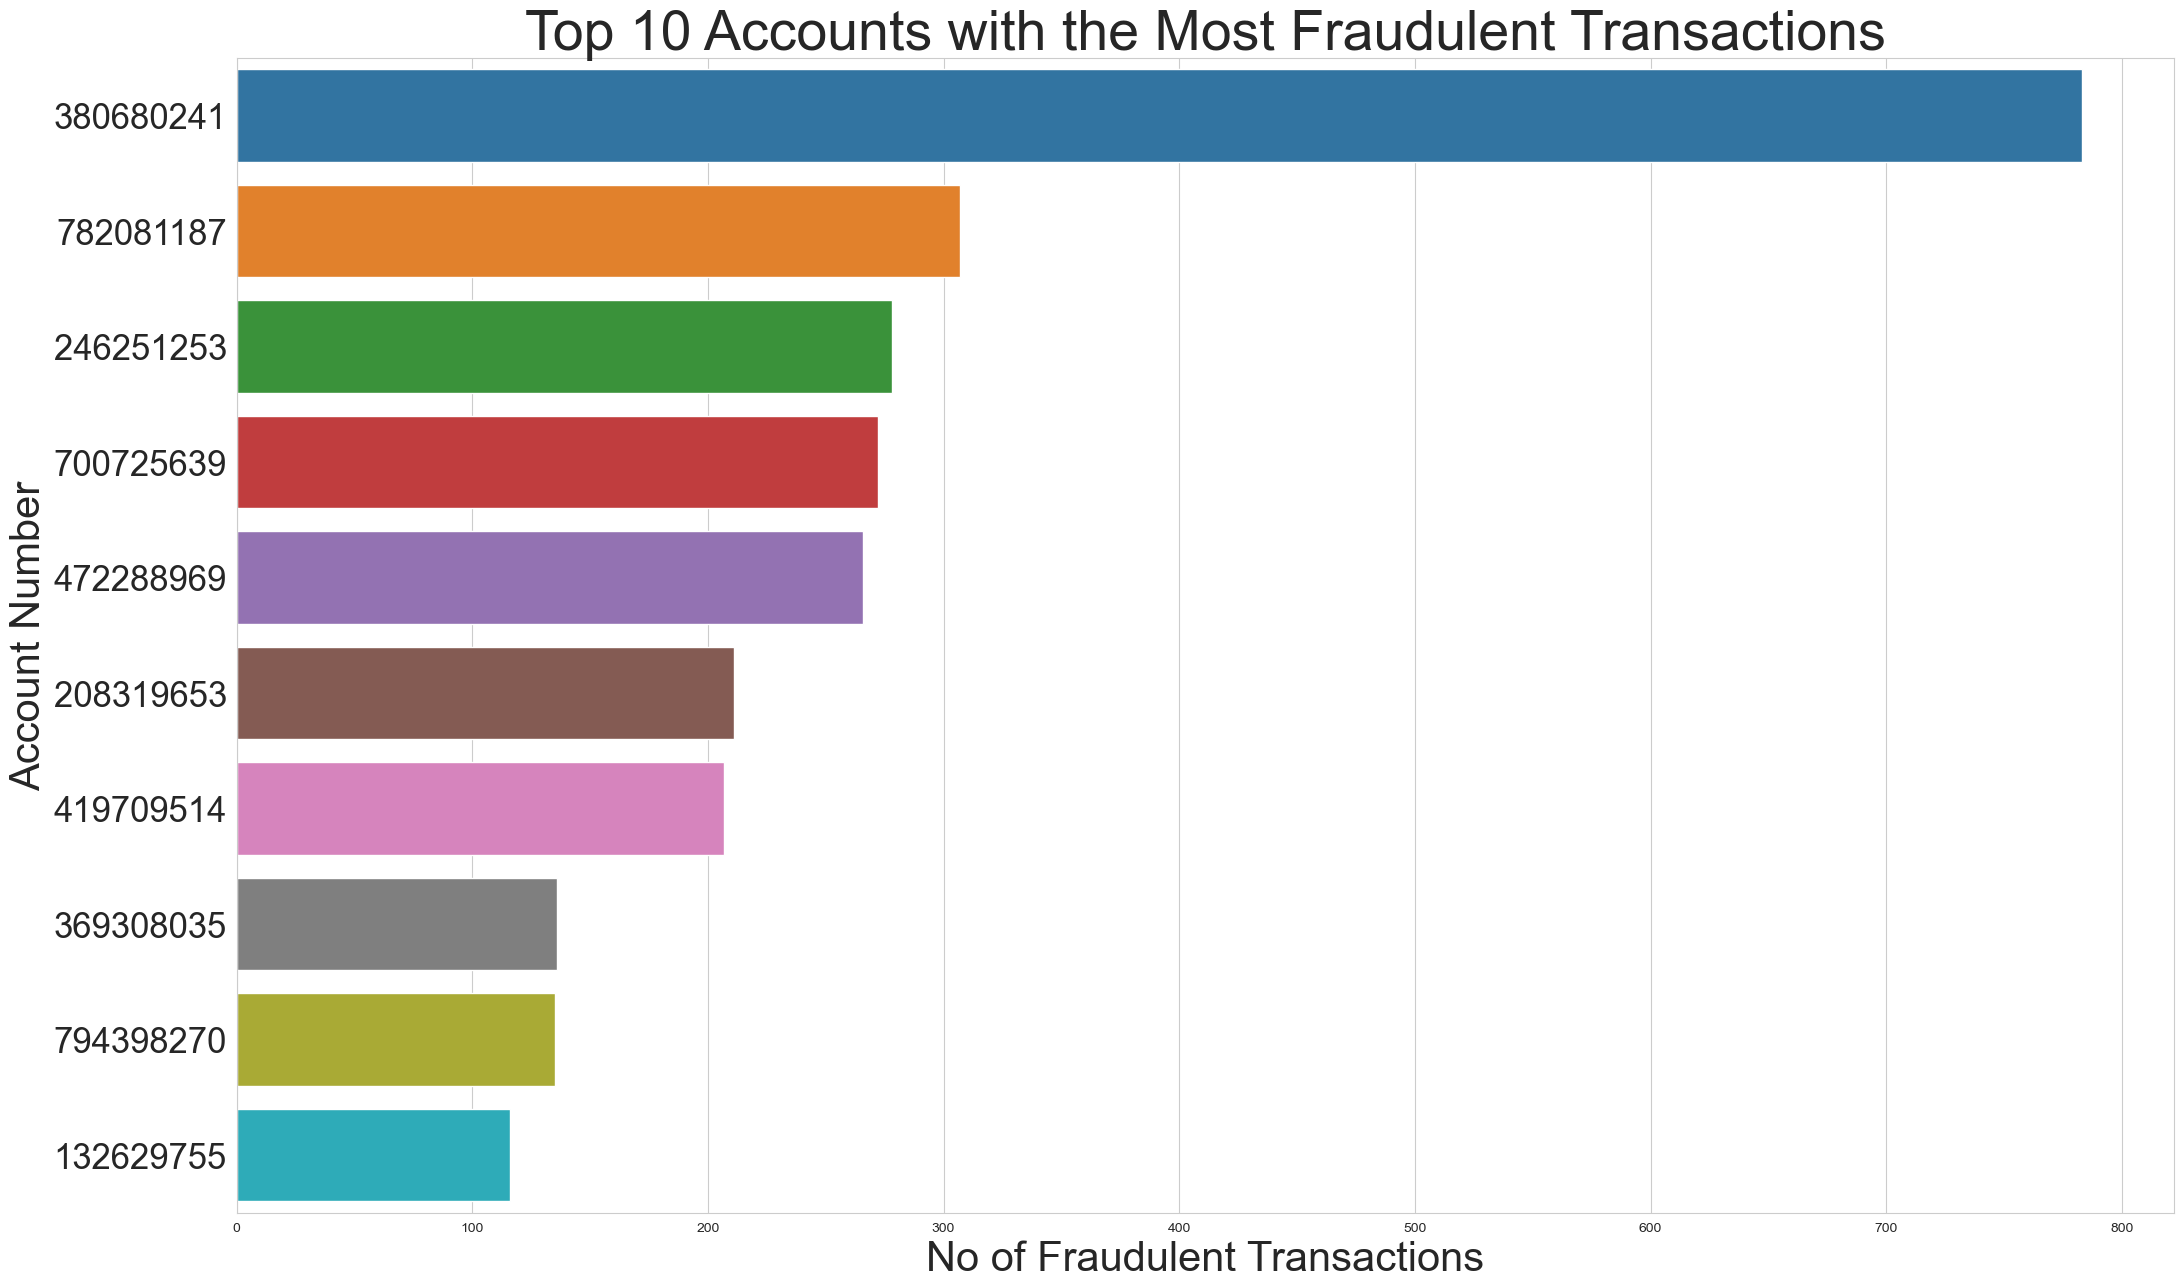

In [71]:
fraudTransactions= df_new.loc[df_new['isFraud']==1]
fig= plt.subplots(figsize=(25,15))

fraudulent_accounts = fraudTransactions['accountNumber'].value_counts().head(10)
colors= sns.color_palette("Set2", len(fraudulent_accounts))
sns.barplot(y=list(range(10)), x=fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(10)), labels=fraudulent_accounts.index.tolist(), fontsize = 25)
plt.ylabel('Account Number', fontsize=30)
plt.xlabel('No of Fraudulent Transactions', fontsize=30)
plt.title('Top 10 Accounts with the Most Fraudulent Transactions', fontsize= 40)

In [72]:
pd.to_pickle(df_new, 'data/pickles/df_new', protocol=4)